In [21]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [22]:
# read and show a gray image

img_gray = cv2.imread('download.jpeg',0)
cv2.imshow('lenna', img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)

[[ 88  92  93 ... 151 151 151]
 [ 89  91  92 ... 151 151 151]
 [ 89  87  86 ... 151 151 151]
 ...
 [ 11  11  11 ...  64  64  64]
 [ 11  11  11 ...  64  64  64]
 [ 11  11  11 ...  64  64  64]]


In [23]:
print(img_gray.dtype)

uint8


In [24]:
print(img_gray.shape)

(168, 300)


In [25]:
img = cv2.imread('download.jpeg')
cv2.imshow('cat', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [6]:
img_crop = img[:100, 0:200]
cv2.imshow('crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [7]:
B,G,R = cv2.split(img)
# cv2.imshow('B',B)
cv2.imshow('B',G)
cv2.imshow('B',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [1]:
# image 2 random light color


def random_light_color(img):
    B,G,R = cv2.split(img)
    
    b_rand = random.randint(-50,50)
    if b_rand ==0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B>lim] = 255
        B[B<=lim] = (b_rand+B[B<=lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B<lim] = 0
        B[B>=lim] = (b_rand + B[B>=lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand >0:
        lim = 255 - g_rand
        G[G>lim] = 255
        G[G<=lim] = (g_rand + G[G<=lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0- g_rand
        G[G<lim] = 0
        G[G>=lim] = (g_rand + G[G>=lim]).astype(img.dtype)
        
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)

    img_merge = cv2.merge((B, G, R))
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge

In [2]:
img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
if key == cv2.waitKey():
    cv2.destroyAllWindows()

NameError: name 'img' is not defined

In [10]:
def adjust_gamma(image, gamma = 1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(image, table)

img_brighter = adjust_gamma(img, 4)
# cv2.imshow('img_dark', img)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [11]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)

(array([ 161.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          46.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   46.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   68.,    0.,    0.,    0.,    0.,    0.,    0.,
         137.,    0.,    0.,    0.,    0.,  108.,    0.,    0.,    0.,
         122.,    0.,    0.,    0.,  124.,    0.,    0.,    0.,  125.,
           0.,    0.,  190.,    0.,    0.,  159.,    0.,    0.,  165.,
           0.,  160.,    0.,    0.,  161.,    0.,  172.,    0.,  148.,
      

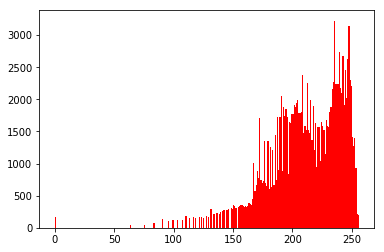

In [12]:
ｉｍｇ_small_brighter = cv2.resize(img_brighter, 
                                (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))

plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')


In [20]:
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)

In [33]:
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(Ã÷ÁÁ¶È), u&v: É«¶È±¥ºÍ¶È
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [9]:
img = cv2.imread('download.jpeg')
cv2.imshow('cat', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [10]:
img[:,:,0] = cv2.equalizeHist(img[:,:,0])
img[:,:,1] = cv2.equalizeHist(img[:,:,1])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
cv2.imshow('cat', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [17]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
print(M)

[[  0.8660254    0.5        -21.90381057]
 [ -0.5          0.8660254   86.25386608]]


In [18]:
# set M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

[[  0.8660254    0.5        -21.90381057]
 [ -0.5          0.8660254   86.25386608]]


In [14]:
M[0][2] = M[1][2] = 0

In [15]:
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
print(M)

[[ 0.4330127  0.25       0.       ]
 [-0.25       0.4330127  0.       ]]


In [13]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[ 0.4330127   0.25       64.04809472]
 [-0.25        0.4330127  85.12693304]]


In [19]:
##############################
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [20]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()